In [1]:
from bs4 import BeautifulSoup
import requests
# Here, we're just importing both Beautiful Soup and the Requests library
page_link = 'https://www.sec.gov/cgi-bin/current?q1=5&q2=4&q3='
# this is the url that we've already determined is safe and legal to scrape from.
page_response = requests.get(page_link, timeout=5)
# here, we fetch the content from the url, using the requests library
page_content = BeautifulSoup(page_response.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.

# Scraping 8K forms

In [2]:
# read the file of CIKs
import pandas as pd

df = pd.read_csv(r"finance_CIK_2.csv")

In [3]:
df.head()

,CIK,url,company,tr_length,8k_url
0,799033,/cgi-bin/browse-edgar?action=getcompany&CIK=00...,AIRLEASE LTD,17,https://www.sec.gov/cgi-bin/browse-edgar?actio...
1,1501293,/cgi-bin/browse-edgar?action=getcompany&CIK=00...,ALLY US LLC,2,https://www.sec.gov/cgi-bin/browse-edgar?actio...
2,1561092,/cgi-bin/browse-edgar?action=getcompany&CIK=00...,"Avangard Capital Group, Inc",8,https://www.sec.gov/cgi-bin/browse-edgar?actio...
3,711513,/cgi-bin/browse-edgar?action=getcompany&CIK=00...,BOEING CAPITAL CORP,44,https://www.sec.gov/cgi-bin/browse-edgar?actio...
4,1339786,/cgi-bin/browse-edgar?action=getcompany&CIK=00...,CIT Group Funding Co of Delaware LLC,2,https://www.sec.gov/cgi-bin/browse-edgar?actio...


In [4]:
ek_url = df["8k_url"].values.tolist()

# Here, we're just importing both Beautiful Soup and the Requests library
page_link_e = str(ek_url[0])
# this is the url that we've already determined is safe and legal to scrape from.
page_response_e = requests.get(page_link_e, timeout=5)
# here, we fetch the content from the url, using the requests library
page_content_e = BeautifulSoup(page_response_e.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.

In [5]:
ek_url

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=799033&type=8-K&dateb=&owner=include&count=40',
 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1501293&type=8-K&dateb=&owner=include&count=40',
 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1561092&type=8-K&dateb=&owner=include&count=40',
 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=711513&type=8-K&dateb=&owner=include&count=40',
 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1339786&type=8-K&dateb=&owner=include&count=40',
 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=20388&type=8-K&dateb=&owner=include&count=40',
 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1073179&type=8-K&dateb=&owner=include&count=40',
 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=801550&type=8-K&dateb=&owner=include&count=40',
 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1057538&type=8-K&dateb=&owne

In [6]:
text_label = []
text_a = []
text_text = []

for table in page_content_e.findAll('table', {'class': "tableFile2"}):
    for tr in table.findAll('tr'):
        for td in table.findAll('td', {'nowrap':'nowrap'}):
            text_label.append(td.text)
            
for table in page_content_e.findAll('table', {'class': "tableFile2"}):
    for tr in table.findAll('tr'):
        for td in table.findAll('td', {'nowrap':'nowrap'}):
            for a in td.findAll('a', {'id':'documentsbutton'}):
                text_a.append(a)
                
for table in page_content_e.findAll('table', {'class': "tableFile2"}):
    for tr in table.findAll('tr'):
        for td in table.findAll('td'):
            text_text.append(td.text)

In [7]:
text_label

['8-K',
 '\xa0Documents',
 '001-09259041056025         ',
 '8-K',
 '\xa0Documents',
 '001-09259041039076         ',
 '8-K',
 '\xa0Documents',
 '001-0925904852258         ',
 '8-K',
 '\xa0Documents',
 '001-0925904805544         ',
 '8-K',
 '\xa0Documents',
 '001-0925904550189         ',
 '8-K',
 '\xa0Documents',
 '001-09259031064161         ',
 '8-K',
 '\xa0Documents',
 '001-0925903925117         ',
 '8-K',
 '\xa0Documents',
 '001-0925903899708         ',
 '8-K',
 '\xa0Documents',
 '001-0925903687846         ',
 '8-K',
 '\xa0Documents',
 '001-0925902750708         ',
 '8-K',
 '\xa0Documents',
 '001-0925902686693         ',
 '8-K',
 '\xa0Documents',
 '001-0925998661423         ',
 '8-K',
 '\xa0Documents',
 '001-0925997556648         ',
 '8-K',
 '\xa0Documents',
 '001-0925996618281         ',
 '8-K',
 '\xa0Documents',
 '001-09259041056025         ',
 '8-K',
 '\xa0Documents',
 '001-09259041039076         ',
 '8-K',
 '\xa0Documents',
 '001-0925904852258         ',
 '8-K',
 '\xa0Documents',


In [8]:
import re 
for i in text_text:
    dates = [x for x in i if re.match(r'd{4}-d{2}-d{2}',x)]
    
dates

[]

In [9]:
text_label_8 = []

for i in text_label:
    if i == "8-K":
        text_label_8.append(i)
        
print(len(text_label_8))
print(len(text_a))

210
210


In [10]:
text_a

[<a href="/Archives/edgar/data/799033/000109230604000729/0001092306-04-000729-index.htm" id="documentsbutton"> Documents</a>,
 <a href="/Archives/edgar/data/799033/000109230604000715/0001092306-04-000715-index.htm" id="documentsbutton"> Documents</a>,
 <a href="/Archives/edgar/data/799033/000109230604000453/0001092306-04-000453-index.htm" id="documentsbutton"> Documents</a>,
 <a href="/Archives/edgar/data/799033/000109230604000376/0001092306-04-000376-index.htm" id="documentsbutton"> Documents</a>,
 <a href="/Archives/edgar/data/799033/000109230604000050/0001092306-04-000050-index.htm" id="documentsbutton"> Documents</a>,
 <a href="/Archives/edgar/data/799033/000109230603000655/0001092306-03-000655-index.htm" id="documentsbutton"> Documents</a>,
 <a href="/Archives/edgar/data/799033/000109230603000454/0001092306-03-000454-index.htm" id="documentsbutton"> Documents</a>,
 <a href="/Archives/edgar/data/799033/000109230603000427/0001092306-03-000427-index.htm" id="documentsbutton"> Documen

# This is the original code to scrape ek_url
## Small change - I started with only the first 100 urls

In [11]:
def extract_text_pre_link():
    text_label = []
    text_a = []
    
    # here is the edit
    for i in ek_url[:100]: # furst 100
        # Here, we're just importing both Beautiful Soup and the Requests library
        page_link_e = str(i)
        # this is the url that we've already determined is safe and legal to scrape from.
        page_response_e = requests.get(page_link_e, timeout=5)
        # here, we fetch the content from the url, using the requests library
        page_content_e = BeautifulSoup(page_response_e.content, "html.parser")
        #we use the html parser to parse the url content and store it in a variable.

        for table in page_content_e.findAll('table', {'class': "tableFile2"}):
            for tr in table.findAll('tr'):
                for td in table.findAll('td', {'nowrap':'nowrap'}):
                    for a in td.findAll('a', {'id':'documentsbutton'}):
                        text_a.append(a.get('href'))
            
    return text_a

# Let's refactor the code so that we can perform multithreading

In [12]:
# we define a new function that takes in one link as an argument
# it returns a single list as a result

def extract_text_pre_link_2(link):
    print(link)
    text_a = []
    
    page_link_e = str(link[0])
    page_response_e = requests.get(page_link_e, timeout=5)
    page_content_e = BeautifulSoup(page_response_e.content, "html.parser")
    for table in page_content_e.findAll('table', {'class': "tableFile2"}):
            for tr in table.findAll('tr'):
                for td in table.findAll('td', {'nowrap':'nowrap'}):
                    for a in td.findAll('a', {'id':'documentsbutton'}):
                        text_a.append(a.get('href'))
                        
    return text_a

In [13]:
# let's see what happens when we use the first function

import time
start = time.time()
text_a = extract_text_pre_link()
end = time.time()
print("Time Taken: {:.6f}s".format(end-start))

Time Taken: 51.944220s


In [14]:
# It took 109 seconds to scrape the first 100 ek_urls

text_a

['/Archives/edgar/data/799033/000109230604000729/0001092306-04-000729-index.htm',
 '/Archives/edgar/data/799033/000109230604000715/0001092306-04-000715-index.htm',
 '/Archives/edgar/data/799033/000109230604000453/0001092306-04-000453-index.htm',
 '/Archives/edgar/data/799033/000109230604000376/0001092306-04-000376-index.htm',
 '/Archives/edgar/data/799033/000109230604000050/0001092306-04-000050-index.htm',
 '/Archives/edgar/data/799033/000109230603000655/0001092306-03-000655-index.htm',
 '/Archives/edgar/data/799033/000109230603000454/0001092306-03-000454-index.htm',
 '/Archives/edgar/data/799033/000109230603000427/0001092306-03-000427-index.htm',
 '/Archives/edgar/data/799033/000109230603000195/0001092306-03-000195-index.htm',
 '/Archives/edgar/data/799033/000109230602000291/0001092306-02-000291-index.htm',
 '/Archives/edgar/data/799033/000109230602000220/0001092306-02-000220-index.htm',
 '/Archives/edgar/data/799033/0000009672-98-000037-index.html',
 '/Archives/edgar/data/799033/0000

In [15]:
# check the length
len(text_a)

29172

## The magic starts here

In [16]:
# we import concurrent library and get the ThreadPoolExecutor to set up multithreading

from concurrent.futures import ThreadPoolExecutor, as_completed

# we set max_workers as none so that it takes the max workers your computer can handle
with ThreadPoolExecutor(max_workers=None) as executor:
    start = time.time()
    # initialize an empty list
    ek_results = []
    
    # so over here, we let our executor execute the code in multiple threads
    # when the code in one thread finishes, it appends the "hey I am done signal" into a list called futures
    futures = [ executor.submit(extract_text_pre_link_2, [ek]) for ek in ek_url[:100]]
    
    # for results that are ready, it's then appended into ek_results
    for result in as_completed(futures):
        ek_results.append(result)
        
    end = time.time()
    print("Time Taken: {:.6f}s".format(end-start))

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=799033&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1501293&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1561092&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=711513&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1339786&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=20388&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1073179&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=801550&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1057538&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1719379&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1068875&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1310291&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1054342&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1098193&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1143309&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1123266&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=897708&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1021970&type=8-K&dateb=&o

In [17]:
# notice that it took only 10 seconds for multithread compared to single thread?

# we set a list to append our real results, stored as futures
final = []


for i in ek_results:
    # we use .result() to get the results out of the futures in the list of futures in ek_result
    final.extend(i.result())

# same length, in 10x speed, nice
len(final)

29172

In [18]:
# now we work on the actual full ek_url

with ThreadPoolExecutor(max_workers=None) as executor:
    start = time.time()
    ek_results = []
    futures = [ executor.submit(extract_text_pre_link_2, [ek]) for ek in ek_url]
    for result in as_completed(futures):
        ek_results.append(result)
    end = time.time()
    print("Time Taken: {:.6f}s".format(end-start))

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=799033&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1501293&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1561092&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=711513&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1339786&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=20388&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1073179&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=801550&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1057538&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1406508&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1558432&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=861050&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1766682&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=869497&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1116550&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1224457&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1165930&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1136747&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1160255&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=802778&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1386278&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1129120&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=773933&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1213411&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=351685&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1754303&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1177182&type=8-K&dateb=&ow

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1405976&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=880407&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=760994&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1347004&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1113308&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1092933&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1496623&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1377042&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=785655&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1449139&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1739287&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1096130&type=8-K&dateb=&owner=include&count=40']



['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=318673&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=352849&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1711012&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1416087&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1077633&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1138173&type=8-K&dateb=&

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1015733&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1266525&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1169770&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=760498&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=868572&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1109525&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1295401&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=783739&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1746109&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1304740&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=707604&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=703800&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1108144&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1137217&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1134562&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1023880&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=845926&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1015738&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1366728&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1366729&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1398141&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=831001&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1273805&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1049489&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=764156&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=702163&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1073475&type=8-K&dateb=&ow

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=855890&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=753766&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1006830&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=24058&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1137208&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=733767&type=8-K&dateb=&owner=include&count=40']


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=69952&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1079385&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1087455&type=8-K&dateb=&owner=i

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=36161&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1026564&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1026565&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1026566&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=70040&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=826328&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1013047&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1283582&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1073932&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1027832&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1027833&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1027834&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1027835&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1058612&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1058613&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1058614&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=50341&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1264756&type=8-K&dateb=&ow

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1302369&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045054&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045056&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1128361&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1050258&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=83246&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045058&type=8-K&dateb=&owner=include&count=40']


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1084708&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1469985&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1188139&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1260249&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1137212&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1089109&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1062528&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1057570&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=737287&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=791910&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=316909&type=8-K&dateb=&ow

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=889553&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1169483&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1129920&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1335730&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1054481&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=891284&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1258548&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1169769&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=908962&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1302502&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1084717&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1109546&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1133862&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1102112&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045070&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045071&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=707209&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=805676&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=350847&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=869582&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1452899&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1590799&type=8-K&dateb=&owner=include&count=40']


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1067315&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1160861&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=804238&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=775663&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1083331&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1009569&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1060504&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=754673&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=101320&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=745344&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=856223&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1105880&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1072695&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=750556&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1325546&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1325547&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=714310&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=744471&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1105356&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045088&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1051345&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=715148&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=840256&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1143155&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1093023&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045195&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=787849&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1188135&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1015770&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=109380&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1144816&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1023906&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=763538&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1126582&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1160330&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=315708&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=907584&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1234383&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=702513&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=718907&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=810689&type=8-K&dateb=&owner

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1022809&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1341317&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=860554&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=771614&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=850210&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=802681&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=830257&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1522420&type=8-K&dateb=&owner=include&count=40']


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1034920&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=812348&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=822371&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=932780&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1213432&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1048019&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1168010&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1167997&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1167998&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=718607&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=927478&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=776815&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=894508&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=742279&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1067599&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1014133&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=855874&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=852677&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1047446&type=8-K&dateb=&owner=


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1074774&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1083643&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=710507&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1649749&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1011033&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=893539&type=8-K&dateb=&owner=include&count=40']


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1065420&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1157515&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1065959&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=854395&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1413837&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=354948&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=826491&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1024132&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=709386&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=36377&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=36416&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1562463&type=8-K&dateb=&owner=i

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1068756&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1074523&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=741628&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1007029&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1440625&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1248953&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1061068&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=351710&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1026231&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=853085&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=708815&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=876837&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1494186&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1008579&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=756862&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=732417&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1265131&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=737213&type=8-K&dateb=&owner

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1068738&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=714712&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1024525&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1130905&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=794272&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1024512&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1082226&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1000232&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1024526&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1068300&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=200513&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1476034&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1468759&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1068901&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=65637&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1027623&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=711083&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=928033&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=826154&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1086532&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1086173&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=705200&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=731805&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=357264&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1057159&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1093728&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=949504&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1088293&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1088295&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1101860&type=8-K&dateb=&owner=include&count=40']


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=316770&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1065827&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1105975&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1052634&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=948368&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=925312&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=763956&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=356069&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=925464&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=717217&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=723926&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=818677&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=825392&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=825350&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1263762&type=8-K&dateb=&owner=in

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1066626&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1058979&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1058657&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=93751&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1068753&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1036070&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1039392&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=810962&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=891098&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=724098&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1343034&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=225971&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=936301&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1070730&type=8-K&dateb=&owner=include&count=40']



['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1061580&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=811672&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=719550&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=701546&type=8-K&dateb=&owner

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1043451&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1157292&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1024531&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=811553&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1058690&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=737468&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1476264&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=856063&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=788134&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1021136&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1435099&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1013130&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=11913&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1639980&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1122521&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045520&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=800030&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1718116&type=8-K&dateb=&owner

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1475365&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1017793&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1409945&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=947263&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1038584&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1038583&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1295334&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=719245&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1264136&type=8-K&dateb=&ow

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1055766&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1688647&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1003213&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1048778&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1106798&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1161829&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1032037&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=744765&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=870182&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=883811&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1170277&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1207860&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1190014&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1168333&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1179063&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1185024&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1201973&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1201974&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1441824&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=882261&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=72655&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1118953&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=873860&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1415018&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1543606&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1111845&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1089979&type=8-K&dateb=&own

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=5227&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=901514&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=5368&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=887205&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=93779&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=904163&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=352155&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=908139&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1024308&type=8-K&dateb=&owner=include&


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1397058&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1400187&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1400188&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1414429&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1423038&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1429330&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1430576&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1430588&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1431126&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1169059&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1169060&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=50773&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=890951&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=50982&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=55362&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=52301&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=52441&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=909815&type=8-K&dateb=&owner=inclu

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=355429&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=310826&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1285506&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1285507&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1285508&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1285509&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1285510&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1285511&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1285512&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1377137&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1353234&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1378335&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1382131&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1383245&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1354679&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1356095&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1357542&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1358933&type=8-K&dateb=&

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=898174&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=83047&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=841528&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1038942&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1038943&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1038944&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1038945&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=727892&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=818943&type=8-K&dateb=&owner

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=719241&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=916356&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=854807&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=917246&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1012867&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=913912&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1252449&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1252450&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1126960&type=8-K&dateb=&owner=

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1295646&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1295647&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1295648&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1296384&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1296386&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1296385&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1296906&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1296904&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1286188&type=8-K&dateb=&

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1359689&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1354624&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1359696&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1361547&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1361528&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1361529&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1362087&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1362157&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1363686&type=8-K&dateb=

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1382130&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1382550&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1356794&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1382555&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1382561&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1383252&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1383254&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1383257&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1384963&type=8-K&dateb=

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1398144&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1398148&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1398156&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1398700&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1398766&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1398796&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1399442&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1399450&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1399451&type=8-K&dateb=

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1435442&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1435441&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1435440&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1436070&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1436071&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1436072&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1436544&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1436545&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1436546&type=8-K&dateb=

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1591890&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=100331&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1985&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1056834&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=74783&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=933537&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1282543&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1040514&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1249955&type=8-K&dateb=&owner=

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1582086&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1192696&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1198917&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1199157&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1272957&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1036831&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1036832&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1036833&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1199153&type=8-K&dateb=&


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1036836&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1010247&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1271245&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=898493&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1198926&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=786344&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=277795&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=317745&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=40799&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1412100&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1338949&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1044772&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1199164&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1096343&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=803509&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=275710&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1087780&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=949156&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=9346&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1037302&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=799721&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1264242&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1042070&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=74347&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1036841&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=356395&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=83053&type=8-K&dateb=&owner=i

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=99429&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1010551&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=919482&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1198951&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1127783&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1040591&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=787952&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1122211&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=100716&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1488922&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=910110&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=763842&type=8-K&dateb=&owner=include&count=40']


['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=935724&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=890926&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1352713&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1097090&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1163710&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1550035&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=898438&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=834408&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=79282&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1090403&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1363851&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=729472&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1449866&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1063980&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1187449&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1263722&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1263723&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1263724&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1290939&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1292765&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1292766&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1292790&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1260232&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1023334&type=8-K&dateb=&

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=820167&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1046207&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1055777&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1081374&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1513161&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=932268&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1016628&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1031258&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1534461&type=8-K&dateb=&o

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=881039&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1042023&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=881056&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=876297&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1015198&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=881034&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=881037&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1047615&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1059164&type=8-K&dateb=&owne

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1143986&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=933166&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1386044&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1081812&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1050705&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=320545&type=8-K&dateb=&owner=include&count=40']['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1534717&type=8-K&dateb=&owner=include&count=40']

['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1072739&type=8-K&dateb=&owner=include&count=40']
['https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1434621&type=8-K&dateb=&

In [19]:
# neat huh? only 11 mins for 2M results

final = []

for i in ek_results:
    final.extend(i.result())
    
len(final)

2014346

In [20]:
data = {"links":final}
df_pre_links = pd.DataFrame(data)
df_pre_links.to_csv("pre_links.csv", index=None)

In [21]:
df_pre_links.head()

,links
0,/Archives/edgar/data/799033/000109230604000729...
1,/Archives/edgar/data/799033/000109230604000715...
2,/Archives/edgar/data/799033/000109230604000453...
3,/Archives/edgar/data/799033/000109230604000376...
4,/Archives/edgar/data/799033/000109230604000050...


In [22]:
data = {"links":text_a}
df_pre_links = pd.DataFrame(data)
df_pre_links.to_csv("pre_links.csv")

# Now we enter each url to extract the information that we're interested in

In [23]:
# define a test link
p_link = "http://www.sec.gov" + "/Archives/edgar/data/799033/000109230604000729/0001092306-04-000729-index.htm"

page_link_p = p_link

# this is the url that we've already determined is safe and legal to scrape from.
page_response_p = requests.get(page_link_p, timeout=5)

# here, we fetch the content from the url, using the requests library
page_content_p = BeautifulSoup(page_response_p.content, "html.parser")

In [24]:
# print the url so we can check manually
page_link_p

'http://www.sec.gov/Archives/edgar/data/799033/000109230604000729/0001092306-04-000729-index.htm'

# This is the original code 

In [25]:
table = page_content_p.find('table', attrs={'class':'tableFile'})
table_rows = table.find_all('tr')
l = []
a_list = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    l.append(row)
df_ext = pd.DataFrame(l, columns=["A", "B", "C","D","E"])
#df_ext = df_ext[df_ext["D"] == "8-K"]   

for tr in table_rows:
    for td in tr.findAll('td'):
        for a in td.findAll('a'):
            a_list.append(a.get('href'))

In [26]:
df_ext

,A,B,C,D,E
0,None,None,None,None,None
1,1,FORM 8-K DATED 09-30-04,form8k.txt,8-K,4169
2,2,EXHIBIT 99.1 - PRESS RELEASE DATED 09-30-04,ex99-1.txt,EX-99,1054
3,,Complete submission text file,0001092306-04-000729.txt,,6996


In [27]:
# Get names of indexes for which column Age has value 30
#indexNames = df_ext[df_ext['B'] == "None"].index
#Delete these row indexes from dataFrame
df_ext = df_ext.drop([0])
df_ext

,A,B,C,D,E
1,1,FORM 8-K DATED 09-30-04,form8k.txt,8-K,4169
2,2,EXHIBIT 99.1 - PRESS RELEASE DATED 09-30-04,ex99-1.txt,EX-99,1054
3,,Complete submission text file,0001092306-04-000729.txt,,6996


In [28]:
df_main = pd.DataFrame(columns=["A","B","C","D","E"])

In [29]:
df_main = pd.concat([df_main,df_ext])
df_main

,A,B,C,D,E
1,1,FORM 8-K DATED 09-30-04,form8k.txt,8-K,4169
2,2,EXHIBIT 99.1 - PRESS RELEASE DATED 09-30-04,ex99-1.txt,EX-99,1054
3,,Complete submission text file,0001092306-04-000729.txt,,6996


In [30]:
def extract_df_pre():
    df_main = pd.DataFrame(columns=["A","B","C","D","E"])
    for i in text_a:
        # Here, we're just importing both Beautiful Soup and the Requests library
        p_link = "http://www.sec.gov" + str(i)

        page_link_p = p_link
# this is the url that we've already determined is safe and legal to scrape from.
        page_response_p = requests.get(page_link_p, timeout=5)
# here, we fetch the content from the url, using the requests library
        page_content_p = BeautifulSoup(page_response_p.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.
        table = page_content_p.find('table', attrs={'class':'tableFile'})
        table_rows = table.find_all('tr')
        l = []
        a_list = []
        for tr in table_rows:
            td = tr.find_all('td')
            row = [tr.text for tr in td]
            l.append(row)
        df_ext = pd.DataFrame(l, columns=["A", "B", "C","D","E"])
#df_ext = df_ext[df_ext["D"] == "8-K"]   

        for tr in table_rows:
            for td in tr.findAll('td'):
                for a in td.findAll('a'):
                    a_list.append(a.get('href'))
        df_ext = df_ext.drop([0])
        df_main = pd.concat([df_main,df_ext])
    return df_main

## This is the code that will make you run for many many many hours

In [31]:
df_main = extract_df_pre()
df_main.head(20)

KeyboardInterrupt: 

In [ ]:
df_main.to_csv("df_main_pre.csv")

# [Start here] An alternative way to scrape the individual page information
## We should extract what we need an organize it properly


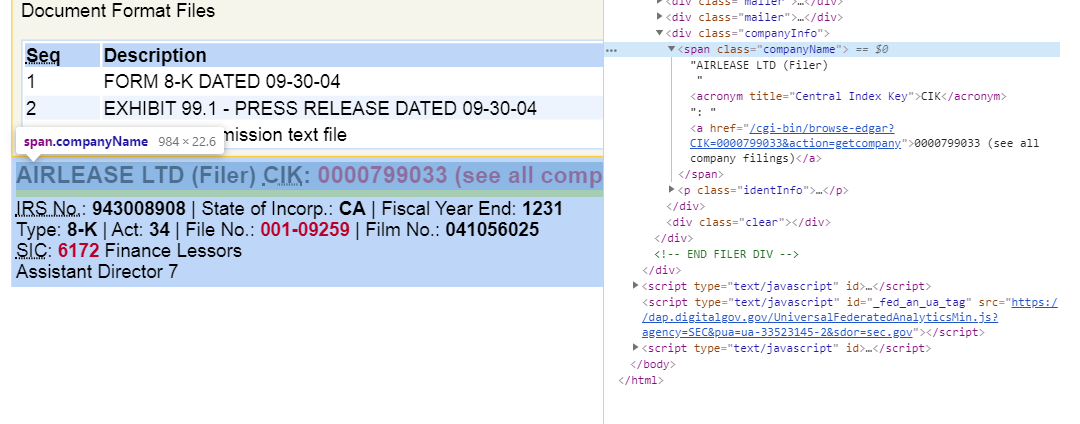

In [32]:
# get the span that contains the company name and CIK
page_content_p.find_all('span', attrs = {'class': 'companyName'})[0]

<span class="companyName">AIRLEASE LTD (Filer)
 <acronym title="Central Index Key">CIK</acronym>: <a href="/cgi-bin/browse-edgar?CIK=0000799033&amp;action=getcompany">0000799033 (see all company filings)</a></span>

In [33]:
# can we do better? yes we can. let's split the span text
split_num_cik = page_content_p.find_all('span', attrs = {'class': 'companyName'})[0].text.split(' (Filer)')

split_num_cik

['AIRLEASE LTD', '\n CIK: 0000799033 (see all company filings)']

In [34]:
# we get the company name by printing the first item
print(split_num_cik[0])

AIRLEASE LTD


In [35]:
# how to extract the CIK?
# get the CIK by using regex, i.e. strip everything and get int only

import re
print(int(re.search(r'\d+', split_num_cik[1]).group()))

799033


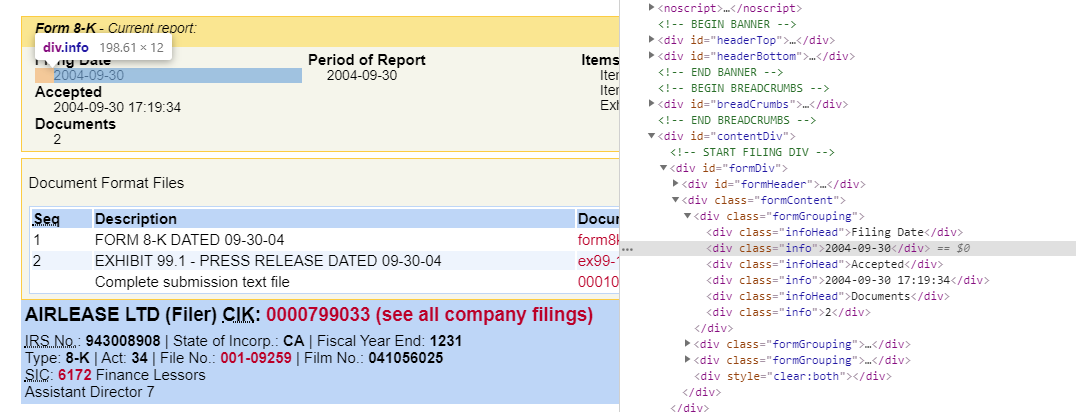

In [36]:
# get the date 
page_content_p.find_all('div', attrs = {'class': 'info'})[0].text

'2004-09-30'

In [37]:
# let's retrieve only the 8k information and the link to the 8k report (finally!)
# start with looking for all the stuff in the table, using tr
tr_content = page_content_p.find_all('tr')

tr_content

[<tr>
 <th scope="col" style="width: 5%;"><acronym title="Sequence Number">Seq</acronym></th>
 <th scope="col" style="width: 40%;">Description</th>
 <th scope="col" style="width: 20%;">Document</th>
 <th scope="col" style="width: 10%;">Type</th>
 <th scope="col">Size</th>
 </tr>, <tr>
 <td scope="row">1</td>
 <td scope="row">FORM 8-K DATED 09-30-04</td>
 <td scope="row"><a href="/Archives/edgar/data/799033/000109230604000729/form8k.txt">form8k.txt</a></td>
 <td scope="row">8-K</td>
 <td scope="row">4169</td>
 </tr>, <tr class="blueRow">
 <td scope="row">2</td>
 <td scope="row">EXHIBIT 99.1 - PRESS RELEASE DATED 09-30-04</td>
 <td scope="row"><a href="/Archives/edgar/data/799033/000109230604000729/ex99-1.txt">ex99-1.txt</a></td>
 <td scope="row">EX-99</td>
 <td scope="row">1054</td>
 </tr>, <tr>
 <td scope="row"> </td>
 <td scope="row">Complete submission text file</td>
 <td scope="row"><a href="/Archives/edgar/data/799033/000109230604000729/0001092306-04-000729.txt">0001092306-04-00072

In [38]:
# the first item is always junk
tr_content[0]

<tr>
<th scope="col" style="width: 5%;"><acronym title="Sequence Number">Seq</acronym></th>
<th scope="col" style="width: 40%;">Description</th>
<th scope="col" style="width: 20%;">Document</th>
<th scope="col" style="width: 10%;">Type</th>
<th scope="col">Size</th>
</tr>

In [39]:
# the second ones, not so
tr_content[1]

<tr>
<td scope="row">1</td>
<td scope="row">FORM 8-K DATED 09-30-04</td>
<td scope="row"><a href="/Archives/edgar/data/799033/000109230604000729/form8k.txt">form8k.txt</a></td>
<td scope="row">8-K</td>
<td scope="row">4169</td>
</tr>

In [40]:
# we find all td 
all_td = tr_content[1].find_all('td')

all_td

[<td scope="row">1</td>,
 <td scope="row">FORM 8-K DATED 09-30-04</td>,
 <td scope="row"><a href="/Archives/edgar/data/799033/000109230604000729/form8k.txt">form8k.txt</a></td>,
 <td scope="row">8-K</td>,
 <td scope="row">4169</td>]

In [41]:
# iterative through the td and find '8-k'

for i in range(len(all_td)):
    if all_td[i].text == '8-K':
        print(all_td[i-1].a['href'])

/Archives/edgar/data/799033/000109230604000729/form8k.txt


In [42]:
# time to structure a function that can do all of these at one go

def extract_df_pre2(link):
    companyName = []
    CIK = []
    fileDate = []
    ek_link = []
    
    base_url = "http://www.sec.gov"
    ek_url = base_url + link

    page_response_p = requests.get(ek_url, timeout=5)
    page_content_p = BeautifulSoup(page_response_p.content, "html.parser")
    
    split_name_cik = page_content_p.find_all('span', attrs = {'class': 'companyName'})[0].text.split(' (Filer)')
    
    companyName.append(split_name_cik[0])
    CIK.append(int(re.search(r'\d+', split_num_cik[1]).group()))
    fileDate.append(page_content_p.find_all('div', attrs = {'class': 'info'})[0].text)
    
    tr_content = page_content_p.find_all('tr')
    for items in tr_content[1:]:
        all_td = items.find_all('td')
        for i in range(len(all_td)):
            if all_td[i].text == '8-K':
                ek_link.append(all_td[i-1].a['href'])
                
    df = pd.DataFrame({"companyName": companyName, "CIK": CIK, "filedDate": fileDate, "url": ek_link})
    
    return df

In [43]:
extract_df_pre2(text_a[0])

,companyName,CIK,filedDate,url
0,AIRLEASE LTD,799033,2004-09-30,/Archives/edgar/data/799033/000109230604000729...


In [60]:
twoM_data = pd.read_csv("pre_links.csv", index_col=None)

len(twoM_data["links"])

29172

In [45]:
with ThreadPoolExecutor(max_workers=None) as executor:
    start = time.time()
    extract_df_results = []
    futures = [ executor.submit(extract_df_pre2, url) for url in twoM_data['links']]
    for result in as_completed(futures):
        extract_df_results.append(result)
    end = time.time()
    print("Time Taken: {:.6f}s".format(end-start))

Time Taken: 302.290252s


In [57]:
df_results = []

for i in extract_df_results:
    try: 
        df_results.append(i.result())
    except:
        pass
    
combined = pd.concat(df_results)
combined

,companyName,CIK,filedDate,url
0,AIRLEASE LTD,799033,2004-05-14,/Archives/edgar/data/799033/000109230604000376...
0,AIRLEASE LTD,799033,2004-09-30,/Archives/edgar/data/799033/000109230604000729...
0,AIRLEASE LTD,799033,2004-06-07,/Archives/edgar/data/799033/000109230604000453...
0,AIRLEASE LTD,799033,2004-09-30,/Archives/edgar/data/799033/000109230604000729...
0,AIRLEASE LTD,799033,2004-01-29,/Archives/edgar/data/799033/000109230604000050...
...,...,...,...,...
0,"BLUCORA, INC.",799033,2019-06-14,/Archives/edgar/data/1068875/00011931251917367...
0,"BLUCORA, INC.",799033,2017-03-30,/Archives/edgar/data/1068875/00011931251710261...
0,"BLUCORA, INC.",799033,2017-08-16,/Archives/edgar/data/1068875/00011931251725906...
0,"BLUCORA, INC.",799033,2019-09-09,/ix?doc=/Archives/edgar/data/1068875/000119312...


In [58]:
len(combined["CIK"])

2001